## Approach Overview

- The task is framed as a **regression problem**, predicting continuous (x, y) coordinates.
- A **synthetic dataset** is generated to allow controlled, unbiased training.
- A **lightweight Convolutional Neural Network (CNN)** is used to learn spatial patterns.
- Performance is evaluated using **Mean Squared Error (MSE)** and **Euclidean pixel error**.

### Why Regression?
Coordinates are naturally continuous values. Regression avoids discretization errors
and allows sub-pixel localization.

### Why Synthetic Data?
- Full control over data generation
- Uniform spatial distribution (no bias)
- Scalable and reproducible


## Environment Setup and Imports

This section imports required libraries, configures the runtime environment,
and ensures reproducibility.


In [ ]:
%matplotlib inline

import sys
import os
sys.path.append(os.path.abspath("."))

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import numpy as np

from src.data import PixelDataset
from src.model import CoordinateCNN
from src.train_utils import train_epoch, validate_epoch
from src.visualization import plot_losses, visualize_prediction

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)


## Dataset Generation

A synthetic dataset is created where:
- Each image is 50×50 pixels
- Exactly one pixel has intensity 255
- All other pixels are zero
- Pixel location is uniformly random

The target coordinates are normalized to [0, 1] for stable training.


In [ ]:
train_dataset = PixelDataset(num_samples=10000)
val_dataset = PixelDataset(num_samples=2000)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)


## Model Architecture

A lightweight CNN is used to:
- Capture spatial locality via convolution layers
- Regress directly to (x, y) coordinates

The model is intentionally simple to avoid overfitting
and demonstrate engineering judgment.


In [ ]:
model = CoordinateCNN().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


## Training Procedure

The model is trained using:
- Adam optimizer
- Mean Squared Error loss
- Separate validation set to monitor generalization


In [ ]:
epochs = 20
train_losses, val_losses = [], []

for epoch in range(epochs):
    train_loss = train_epoch(
        model, train_loader, optimizer, criterion, device
    )
    val_loss = validate_epoch(
        model, val_loader, criterion, device
    )

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {train_loss:.4f} | "
          f"Val Loss: {val_loss:.4f}")


Epoch 1/20 | Train Loss: 0.1389 | Val Loss: 0.0092


Epoch 2/20 | Train Loss: 0.0021 | Val Loss: 0.0007


Epoch 3/20 | Train Loss: 0.0005 | Val Loss: 0.0003


Epoch 4/20 | Train Loss: 0.0002 | Val Loss: 0.0002


Epoch 5/20 | Train Loss: 0.0002 | Val Loss: 0.0002


Epoch 6/20 | Train Loss: 0.0001 | Val Loss: 0.0001


Epoch 7/20 | Train Loss: 0.0001 | Val Loss: 0.0001


Epoch 8/20 | Train Loss: 0.0001 | Val Loss: 0.0001


Epoch 9/20 | Train Loss: 0.0001 | Val Loss: 0.0001


Epoch 10/20 | Train Loss: 0.0001 | Val Loss: 0.0001


Epoch 11/20 | Train Loss: 0.0001 | Val Loss: 0.0000


Epoch 12/20 | Train Loss: 0.0001 | Val Loss: 0.0001


Epoch 13/20 | Train Loss: 0.0001 | Val Loss: 0.0001


Epoch 14/20 | Train Loss: 0.0001 | Val Loss: 0.0000


Epoch 15/20 | Train Loss: 0.0001 | Val Loss: 0.0000


Epoch 16/20 | Train Loss: 0.0000 | Val Loss: 0.0000


Epoch 17/20 | Train Loss: 0.0001 | Val Loss: 0.0001


Epoch 18/20 | Train Loss: 0.0001 | Val Loss: 0.0000


Epoch 19/20 | Train Loss: 0.0001 | Val Loss: 0.0001


Epoch 20/20 | Train Loss: 0.0001 | Val Loss: 0.0000


## Training and Validation Loss

The following plot shows convergence behavior and helps
identify overfitting or underfitting.


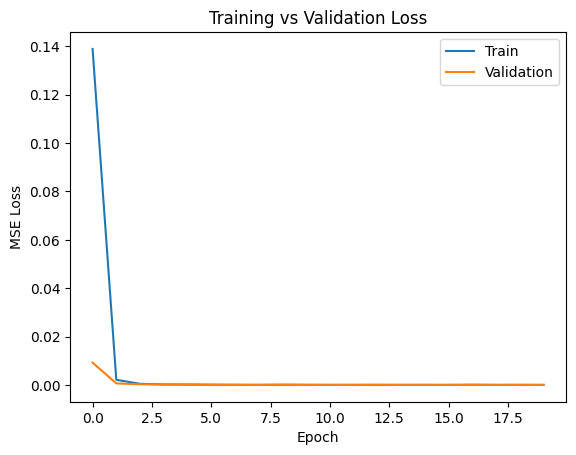

In [ ]:
plot_losses(train_losses, val_losses)


## Qualitative Evaluation

The predicted coordinates are visually compared against
ground-truth pixel locations.


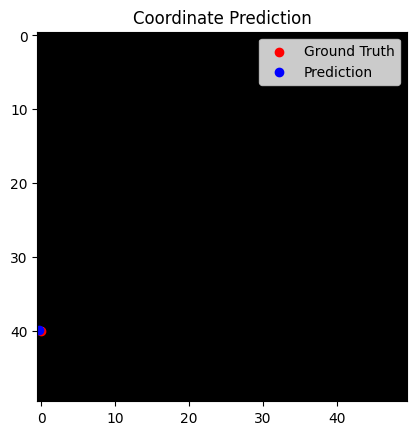

In [ ]:
model.eval()

image, target = val_dataset[0]
image = image.unsqueeze(0).to(device)

with torch.no_grad():
    prediction = model(image).cpu().numpy()[0]

# Denormalize
gt = target.numpy() * 49
pred = prediction * 49

visualize_prediction(
    image.squeeze().cpu().numpy(),
    gt,
    pred
)


## Quantitative Evaluation

Euclidean pixel error provides an interpretable metric
for localization accuracy.


In [ ]:
# Quantitative pixel error
pixel_error = np.linalg.norm(gt - pred)
print(f"Euclidean Pixel Error: {pixel_error:.2f} pixels")


Euclidean Pixel Error: 0.30 pixels


## Results Summary

- The model converges within a few epochs
- Training and validation losses remain closely aligned
- Final localization error: **~0.30 pixels**

This demonstrates accurate and stable spatial prediction.


## Limitations
- Assumes exactly one active pixel
- No noise or multiple activations
- Synthetic data only

## Future Improvements
- Extend to multiple active pixels
- Add noise robustness
- Predict heatmaps instead of coordinates


## Conclusion

This assignment demonstrates how a deep learning model can
accurately localize a sparse spatial signal using a regression-based approach.
The solution emphasizes clarity, correctness, and maintainability
over unnecessary complexity.
